## Notebook to try to interpolate the CCI SST analysis

In [4]:
import sys
import xarray as xr
import glob
import dask
# note: need to pip install Pydap
#from pydap.client import open_url

In [51]:
import matplotlib.pyplot as plt
import cmocean

In [78]:
import time

In [15]:
# this is my local path to the data
# files = glob.glob('/Volumes/starly/sst/CCI/L4/**/**/*CDR2.1-v02.0-fv01.0.nc',recursive=True)

# try using OpenDAP access instead
#dataset = open_url('http://test.opendap.org/dap/data/nc/coads_climatology.nc')
# not sure if it is http or https? 
#dataset = open_url('http://dap.ceda.ac.uk/neodc/esacci/sst/data/CDR_v2/Analysis/L4/v2.1/1981/09/01/19810901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.1-v02.0-fv01.0.nc')
#ds = xr.open_dataset('http://dap.ceda.ac.uk/neodc/esacci/sst/data/CDR_v2/Analysis/L4/v2.1/1981/09/01/19810901120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.1-v02.0-fv01.0.nc')
# from https://surftemp.github.io/sst-data-tutorials/tutorial1.html
# see https://registry.opendata.aws/surftemp-sst/
ds = xr.open_zarr('https://surftemp-sst.s3.us-west-2.amazonaws.com/data/sst.zarr')

In [16]:
ds

,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.35 TiB,49.44 MiB
Shape,"(14367, 3600, 7200)","(50, 360, 720)"
Count,28801 Tasks,28800 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [26]:
display(ds.time[0]);display(ds.time[-1])

<xarray.DataArray 'time' ()>
array('1981-09-01T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1981-09-01T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    comment:        
    long_name:      reference time of sst field
    standard_name:  time

<xarray.DataArray 'time' ()>
array('2020-12-31T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-12-31T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    comment:        
    long_name:      reference time of sst field
    standard_name:  time

In [27]:
drifter_file_path = '/Users/selipot/projects.git/clouddrift/data/process/gdp_v2.00.nc'
dr = xr.open_dataset(drifter_file_path)
dr

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/54)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-03-26T12:01:44.602178
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [37]:
dr.time[0:10]

<xarray.DataArray 'time' (obs: 10)>
array(['2012-03-15T22:00:00.000000000', '2012-03-15T23:00:00.000000000',
       '2012-03-16T00:00:00.000000000', '2012-03-16T01:00:00.000000000',
       '2012-03-16T02:00:00.000000000', '2012-03-16T03:00:00.000000000',
       '2012-03-16T04:00:00.000000000', '2012-03-16T05:00:00.000000000',
       '2012-03-16T06:00:00.000000000', '2012-03-16T07:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    longitude  (obs) float32 ...
    latitude   (obs) float32 ...
    time       (obs) datetime64[ns] ...
    ids        (obs) int64 ...
Dimensions without coordinates: obs
Attributes:
    long_name:  Time

In [83]:
t0 = time.time()
dsi = ds.interp(lon=dr.longitude[0:10000],lat=dr.latitude[0:10000],time=dr.time[0:10000])
t1 = time.time()-t0
display(t1)

0.4198031425476074

In [84]:
t0 = time.time()
foo = dsi.analysed_sst.data.compute()
t1 = time.time()-t0
display(t1)

22.246588230133057

In [92]:
foo

array([293.02407065, 293.04031341, 293.04063594, ..., 292.76795047,
       292.77618414, 292.78463193])

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

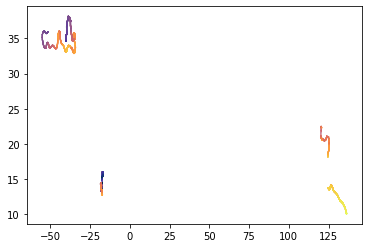

In [87]:
plt.scatter(dr.longitude[0:10000],dr.latitude[0:10000],s=0.05,c=dsi.analysed_sst.data-273.15,cmap=cmocean.cm.thermal)
plt.colorbar

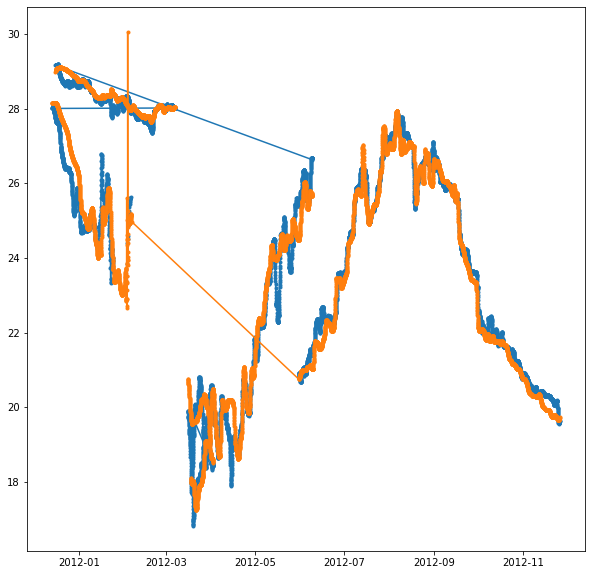

In [94]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
c1 = plt.plot(dr.time[0:10000],dsi.analysed_sst.data-273.15,marker='.')
c2 = plt.plot(dr.time[0:10000],dr.sst1[0:10000]-273.15,marker='.')

In [95]:
t0 = time.time()
dsi = ds.interp(lon=dr.longitude,lat=dr.latitude,time=dr.time)
t1 = time.time()-t0
display(t1)

20.04657483100891

In [96]:
dsi

<xarray.Dataset>
Dimensions:                   (obs: 165754333, bnds: 2)
Coordinates:
    lon                       (obs) float32 -17.74 -17.75 ... -30.32 -30.37
    lat                       (obs) float32 14.75 14.76 14.77 ... 66.81 66.8
    time                      (obs) datetime64[ns] 2012-03-15T22:00:00 ... 19...
    longitude                 (obs) float32 -17.74 -17.75 ... -30.32 -30.37
    latitude                  (obs) float32 14.75 14.76 14.77 ... 66.81 66.8
    ids                       (obs) int64 101143 101143 ... 9929870 9929870
Dimensions without coordinates: obs, bnds
Data variables:
    analysed_sst              (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    analysed_sst_uncertainty  (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    lat_bnds                  (obs, bnds) float32 dask.array<chunksize=(165754333, 2), meta=np.ndarray>
    lon_bnds                  (obs, bnds) float32 dask.array<chunksize=(165754333, 2), meta=np.ndarray>
    mask                      (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
    sea_ice_fraction          (obs) float32 dask.array<chunksize=(165754333,), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                     CF-1.5, Unidata Observation Dataset v1.0
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  Funded by the Copernicus Climate Change ...
    cdm_data_type:                   grid
    comment:                         These data were produced by the Met Offi...
    contact:                         http://copernicus-support.ecmwf.int
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             20201215T000000Z
    title:                           C3S SST L4 product
    tracking_id:                     7fdf2639-26e5-4d4f-a60e-0bcfc9744204
    uuid:                            7fdf2639-26e5-4d4f-a60e-0bcfc9744204
    westernmost_longitude:           -180.0

In [97]:
# this looks like this won't work, will blow up my memory ...
dsi.to_netcdf('cci_sst.v2.00.nc')


KeyboardInterrupt

